### Task 9: Simulate Constant Product Trading
* https://atiselsts.github.io/pdfs/uniswap-v3-liquidity-math.pdf
* https://www.desmos.com/calculator/7wbvkts2jf

In [1]:
import os
import numpy as np
cwd =  os.getcwd().replace("notebooks/test","")
os.chdir(cwd)

In [2]:
from python.dev.token.trade import Convert
from python.dev.cpt import Liquidity
from python.dev.cpt import PriceCurve
from python.dev.cpt import ConstantProductTrade
from python.dev.plot import PlotPriceCurve
from python.dev.token import Token

* Price curve - parabolic curve whose slope changes based on liquidity to reflect price impact
* Price per trade - dots on graph with price curve

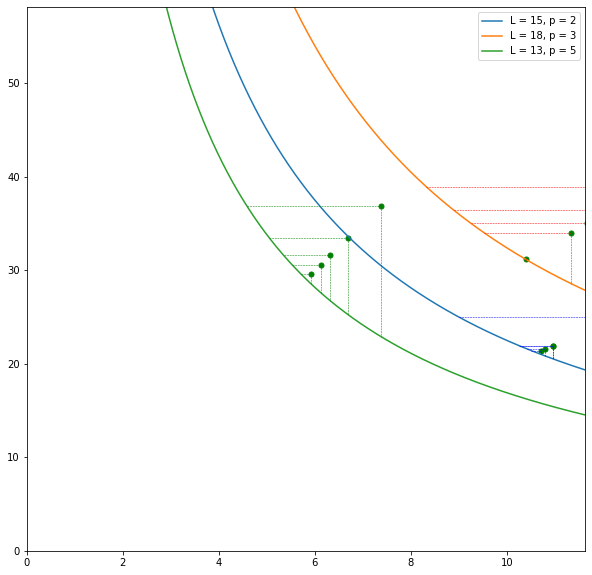

In [3]:
# Plot first curve; liquidity = 15 and price = 2
L = 15; p = 2

cpt = ConstantProductTrade(L)
pCurve = PriceCurve(L)
plotCurve = PlotPriceCurve(L, cpt, pCurve)
plotCurve.apply(p,'L = 15, p = 2')

for k in range(5):
    delta = cpt.random_delta(10)
    plotCurve.plot_trade(p, delta)

# Plot second curve; liquidity = 18 and price = 3
L = 18; p = 3
plotCurve.apply_next(p, L,'L = 18, p = 3')  

for k in range(5):
    delta = cpt.random_delta(10)
    plotCurve.plot_trade(p, delta, 'r--')
    
    
# Plot third curve; liquidity = 16 and price = 5
L = 13; p = 5
plotCurve.apply_next(p, L,'L = 13, p = 5')  

for k in range(5):
    delta = cpt.random_delta(10)
    plotCurve.plot_trade(p, delta, 'g--')    
    

* Initialize test tokens in respect to Native Token
* Initialize Liquidity pool in respect to each trading Token 
* Liquidity changes during trading - possibly bar graphs next to the price curve graph

[Initial] T1: 4716.65 TDT: 4275.49
[Trade 1] T1: 4308.69 TDT: 4683.46
[Trade 2] T1: 4116.36 TDT: 4875.78


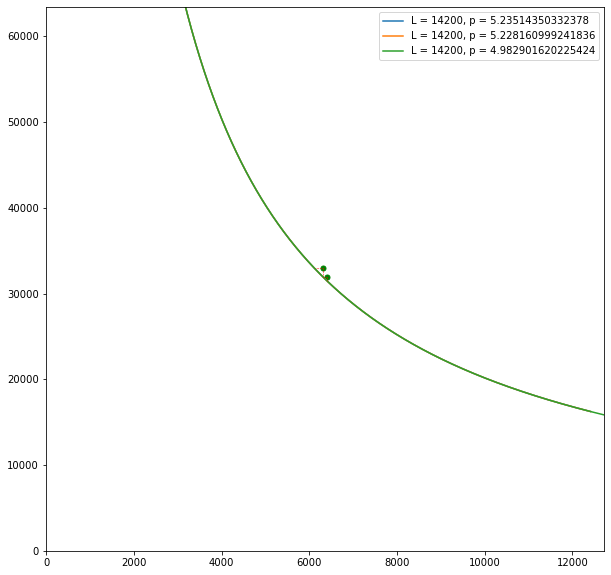

In [4]:
# Initialize Test Tokens

TYPE_DEPOSIT_TOKEN = 'DEPOSIT'
TYPE_DEBT_TOKEN = 'DEBT'

T1 = Token(TYPE_DEPOSIT_TOKEN)
depositT1 = np.random.gamma(2, 2000, 1)[0]
t1Address = T1.gen_address()
T1.deposit(depositT1, t1Address)

TDT = Token(TYPE_DEBT_TOKEN)
depositTDT = np.random.gamma(2, 2000, 1)[0]
tdtAddress = TDT.gen_address()
TDT.deposit(depositTDT, tdtAddress)

x = T1.get_balance_deposits()
y = TDT.get_balance_deposits()

print('[Initial] T1: {:.2f} TDT: {:.2f}'.format(x,y))

native_T1_rate = 2 # native -> T1
native_TDT_rate = 5  # native -> TDT

x = Convert(native_T1_rate).apply(x)
y = Convert(native_TDT_rate).apply(y)

# Initialize Liquidity Pool
liq = Liquidity(x,y)
L = liq.calc(); p = np.random.normal(5,0.1,1)[0]
cpt = ConstantProductTrade(L)
pCurve = PriceCurve(L)
plotCurve = PlotPriceCurve(L, cpt, pCurve)
plotCurve.apply(p, 'L = {}, p = {}'.format(int(L),p))

# Trade #1
# Generate random delta denomenated in Native token, 
# rebalance respective accounts and convert to T1
delta_x = cpt.random_delta(500)

T1.deposit(-delta_x, t1Address)
TDT.deposit(delta_x, tdtAddress)

delta_x = Convert(1/native_T1_rate).apply(delta_x)

L = liq.update(delta_x); p = np.random.normal(5,0.1,1)[0]
plotCurve.apply_next(p, L, 'L = {}, p = {}'.format(int(L),p))
plotCurve.plot_trade(p, delta_x, 'r--')

x = T1.get_balance_deposits()
y = TDT.get_balance_deposits()

print('[Trade 1] T1: {:.2f} TDT: {:.2f}'.format(x,y))

# Trade #2
# Generate random delta denomenated in Native token, 
# rebalance respective accounts and convert to T1
delta_x = cpt.random_delta(500)

T1.deposit(-delta_x, t1Address)
TDT.deposit(delta_x, tdtAddress)

delta_x = Convert(1/native_T1_rate).apply(delta_x)

L = liq.update(delta_x); p = np.random.normal(5,0.1,1)[0]
plotCurve.apply_next(p, L, 'L = {}, p = {}'.format(int(L),p))
plotCurve.plot_trade(p, delta_x, 'r--')

x = T1.get_balance_deposits()
y = TDT.get_balance_deposits()

print('[Trade 2] T1: {:.2f} TDT: {:.2f}'.format(x,y))